In [27]:
import numpy as np
import pandas as pd
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# import packages, functions, and classes
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score, recall_score, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
german_df = pd.read_csv('german.data', delimiter=' ',header=None)

In [3]:
german_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [4]:
german_df.columns=['account_bal','duration','payment_status','purpose','credit_amount','savings_bond_value','employed_since',
                   'intallment_rate','sex_marital','guarantor','residence_since','most_valuable_asset','age','concurrent_credits','type_of_housing',
                   'number_of_existcr','job','number_of_dependents','telephon','foreign','target']


In [5]:
german_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   account_bal           1000 non-null   object
 1   duration              1000 non-null   int64 
 2   payment_status        1000 non-null   object
 3   purpose               1000 non-null   object
 4   credit_amount         1000 non-null   int64 
 5   savings_bond_value    1000 non-null   object
 6   employed_since        1000 non-null   object
 7   intallment_rate       1000 non-null   int64 
 8   sex_marital           1000 non-null   object
 9   guarantor             1000 non-null   object
 10  residence_since       1000 non-null   int64 
 11  most_valuable_asset   1000 non-null   object
 12  age                   1000 non-null   int64 
 13  concurrent_credits    1000 non-null   object
 14  type_of_housing       1000 non-null   object
 15  number_of_existcr     1000 non-null   i

In [7]:
german_df= german_df.replace(['A11','A12','A13','A14'],['neg_bal','positive_bal','positive_bal','no_acc'])
german_df= german_df.replace(['A30','A31','A32','A33','A34'],['credit_free','credit_repaid_bank','credit_repaid_all','credit_delayed','credit_overdue'])
german_df= german_df.replace(['A40','A41','A42','A43','A44','A45','A46','A47','A48','A49','A410'],['car_new','car_used','furniture','radio_tv','domestic_appliance','repairs','education','vacation','retraining','business','other'])
german_df= german_df.replace(['A61','A62','A63','A64','A65'],['low','medium','high','very_high','unknown'])
german_df= german_df.replace(['A71','A72','A73','A74','A75'],['unemp','less_1','less_4','less_7','great_7'])
german_df= german_df.replace(['A91','A92','A93','A94','A95'],['m_d','f_d','m_s','m_m','f_s'])
german_df= german_df.replace(['A91','A92','A93','A94','A95'],['m_d','f_d','m_s','m_m','f_s'])
german_df= german_df.replace(['A91','A92','A93','A94','A95'],['m_d','f_d','m_s','m_m','f_s'])
german_df= german_df.replace(['A101','A102','A103'],['none','co_applicant','guarantor'])
german_df= german_df.replace(['A121','A122','A123','A124'],['none','car','life_insurance','real_estate'])
german_df= german_df.replace(['A141','A142','A143'],['bank','stores','none'])
german_df= german_df.replace(['A151','A152','A153'],['rent','own','free'])
german_df= german_df.replace(['A171','A172','A173','A174'],['unskilled','unskilled','skilled','highly_skilled'])
german_df= german_df.replace(['A191','A192'],['no','yes'])
german_df= german_df.replace(['A201','A202'],['yes','no'])

In [8]:
german_df.isna().any().any()

False

In [9]:
german_df.target.unique()

array([1, 2])

In [10]:
german_df.head()

,account_bal,duration,payment_status,purpose,credit_amount,savings_bond_value,employed_since,intallment_rate,sex_marital,guarantor,...,most_valuable_asset,age,concurrent_credits,type_of_housing,number_of_existcr,job,number_of_dependents,telephon,foreign,target
0,neg_bal,6,credit_overdue,radio_tv,1169,unknown,great_7,4,m_s,none,...,none,67,none,own,2,skilled,1,yes,yes,1
1,positive_bal,48,credit_repaid_all,radio_tv,5951,low,less_4,2,f_d,none,...,none,22,none,own,1,skilled,1,no,yes,2
2,no_acc,12,credit_overdue,education,2096,low,less_7,2,m_s,none,...,none,49,none,own,1,unskilled,2,no,yes,1
3,neg_bal,42,credit_repaid_all,furniture,7882,low,less_7,2,m_s,guarantor,...,car,45,none,free,1,skilled,2,no,yes,1
4,neg_bal,24,credit_delayed,car_new,4870,low,less_4,3,m_s,none,...,real_estate,53,none,free,2,skilled,2,no,yes,2


In [11]:
le= LabelEncoder()
le.fit(german_df.target)
german_df.target=le.transform(german_df.target)
german_df.target.head(5)

0    0
1    1
2    0
3    0
4    1
Name: target, dtype: int64

In [13]:
good_bad_per=round(((german_df.target.value_counts()/german_df.target.count())*100))
good_bad_per


0    70.0
1    30.0
Name: target, dtype: float64

In [16]:
# plt.pie(good_bad_per,labels=['Good loans', 'Bad loans'], autopct='%1.0f%%', startangle=90)
# plt.title('Percentage of good and bad loans');

In [17]:
german_df[['credit_amount','duration','age']].describe()

,credit_amount,duration,age
count,1000.000000,1000.000000,1000.000000
mean,3271.258000,20.903000,35.546000
std,2822.736876,12.058814,11.375469
min,250.000000,4.000000,19.000000
25%,1365.500000,12.000000,27.000000
50%,2319.500000,18.000000,33.000000
75%,3972.250000,24.000000,42.000000
max,18424.000000,72.000000,75.000000


In [18]:
german_df['credit_amount']=np.log(german_df['credit_amount'])
german_df[['credit_amount','duration','age']].describe()

,credit_amount,duration,age
count,1000.000000,1000.000000,1000.000000
mean,7.788691,20.903000,35.546000
std,0.776474,12.058814,11.375469
min,5.521461,4.000000,19.000000
25%,7.219276,12.000000,27.000000
50%,7.749107,18.000000,33.000000
75%,8.287088,24.000000,42.000000
max,9.821409,72.000000,75.000000


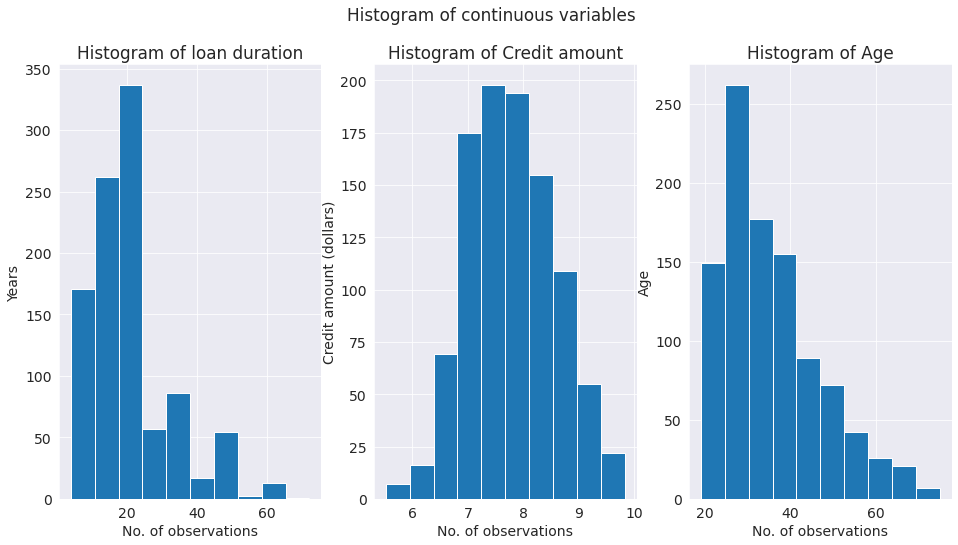

In [19]:
fig, axes = plt.subplots(1,3, figsize=(16,8))
plt.suptitle('Histogram of continuous variables')
axes[0].hist(german_df['duration'])
axes[0].set_xlabel('No. of observations')
axes[0].set_ylabel('Years')
axes[0].set_title('Histogram of loan duration');

axes[1].hist(german_df['credit_amount'])
axes[1].set_xlabel('No. of observations')
axes[1].set_ylabel('Credit amount (dollars)')
axes[1].set_title('Histogram of Credit amount');

axes[2].hist(german_df['age'])
axes[2].set_xlabel('No. of observations')
axes[2].set_ylabel('Age')
axes[2].set_title('Histogram of Age');

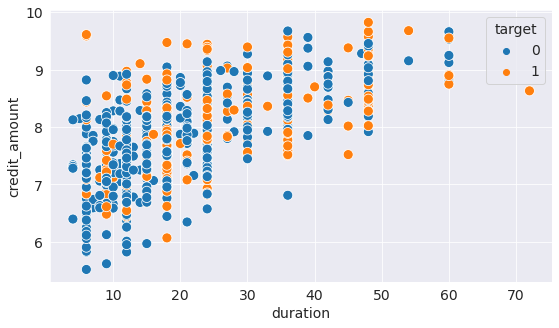

In [20]:
sns.scatterplot(y=german_df.credit_amount, 
                x=german_df.duration, 
                hue=german_df.target, 
                s=100, 
                );

In [21]:
german_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)


account_bal             3
payment_status          5
purpose                10
savings_bond_value      5
employed_since          5
sex_marital             4
guarantor               3
most_valuable_asset     4
concurrent_credits      3
type_of_housing         3
job                     3
telephon                2
foreign                 2
dtype: int64

In [22]:
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in german_df:
    if german_df[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(german_df[col].unique())) <= 2:
            # Train on the training data
            le.fit(german_df[col])
            # Transform both training and testing data
            german_df[col] = le.transform(german_df[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

2 columns were label encoded.


In [23]:
# one-hot encoding of categorical variables
german_df = pd.get_dummies(german_df)

print('Encoded Features shape: ', german_df.shape)

Encoded Features shape:  (1000, 58)


In [24]:
german_df.head()

,duration,credit_amount,intallment_rate,residence_since,age,number_of_existcr,number_of_dependents,telephon,foreign,target,...,most_valuable_asset_real_estate,concurrent_credits_bank,concurrent_credits_none,concurrent_credits_stores,type_of_housing_free,type_of_housing_own,type_of_housing_rent,job_highly_skilled,job_skilled,job_unskilled
0,6,7.063904,4,4,67,2,1,1,1,0,...,0,0,1,0,0,1,0,0,1,0
1,48,8.691315,2,2,22,1,1,0,1,1,...,0,0,1,0,0,1,0,0,1,0
2,12,7.647786,2,3,49,1,2,0,1,0,...,0,0,1,0,0,1,0,0,0,1
3,42,8.972337,2,4,45,1,2,0,1,0,...,0,0,1,0,1,0,0,0,1,0
4,24,8.490849,3,4,53,2,2,0,1,1,...,1,0,1,0,1,0,0,0,1,0


In [25]:
# Find correlations with the target and sort
correlations = german_df.corr()['target'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 type_of_housing_free                 0.081556
foreign                              0.082079
account_bal_positive_bal             0.089895
type_of_housing_rent                 0.092785
concurrent_credits_bank              0.096510
purpose_car_new                      0.096900
employed_since_less_1                0.106397
credit_amount                        0.109570
most_valuable_asset_real_estate      0.125750
payment_status_credit_repaid_bank    0.134448
payment_status_credit_free           0.144767
savings_bond_value_low               0.161007
duration                             0.214927
account_bal_neg_bal                  0.258333
target                               1.000000
Name: target, dtype: float64

Most Negative Correlations:
 account_bal_no_acc              -0.322436
payment_status_credit_overdue   -0.181713
type_of_housing_own             -0.134589
savings_bond_value_unknown      -0.129238
most_valuable_asset_none        -0.119300
concurrent_c

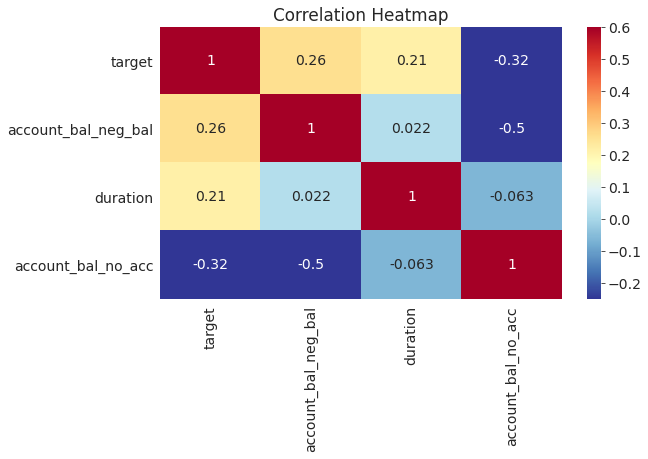

In [26]:
# Extract the significantly correlated variables
corr_data = german_df[['target', 'account_bal_neg_bal','duration','account_bal_no_acc']]
corr_data_corrs = corr_data.corr()


# Heatmap of correlations
sns.heatmap(corr_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

In [28]:
x, y = german_df.drop('target', axis=1), german_df['target']
x.shape, y.shape

((1000, 57), (1000,))

In [47]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=.2, random_state=29, shuffle=True)


In [48]:
x_train.shape, x_test.shape

((800, 57), (200, 57))

In [49]:
# from sklearn.preprocessing import MinMaxScaler

# # scale each feature to 0-1
# scaler = MinMaxScaler(feature_range = (0, 1))

# # fit on features dataset
# scaler.fit(x_train)
# scaler.fit(x_test)
# x_train= scaler.transform(x_train)
# x_test= scaler.transform(x_test)

In [51]:
log_reg = LogisticRegression(C = 0.0001, random_state=29)
# Train on the training data
log_reg.fit(x_train, y_train)

log_reg_pred = log_reg.predict(x_test)
log_reg_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [52]:
recall_test= recall_score(y_test,log_reg.predict(x_test))
roc_test=roc_auc_score(y_test,log_reg.predict_proba(x_test)[:, 1])
print('LR',' recall_test:', round(recall_test,2),' auc_roc_test:', round(roc_test,2))
# tuned_models_test.append(('LR',' recall_test:', round(recall_test,2),' auc_roc_test:', round(roc_test,2)))

# Evaluate on train dataset
roc_train= cross_val_score(log_reg, x_train, y_train, scoring='roc_auc').mean()
recall_train= cross_val_score(log_reg, x_train, y_train, scoring='recall').mean()
print('LR',' recall_train:', round(recall_train,2),' auc_roc_train:', round(roc_train,2))
print(classification_report(y_test, log_reg.predict(x_test)))

LR  recall_test: 0.0  auc_roc_test: 0.83
LR  recall_train: 0.0  auc_roc_train: 0.76
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       133
           1       0.00      0.00      0.00        67

    accuracy                           0.67       200
   macro avg       0.33      0.50      0.40       200
weighted avg       0.44      0.67      0.53       200



/home/dazam/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dazam/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dazam/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


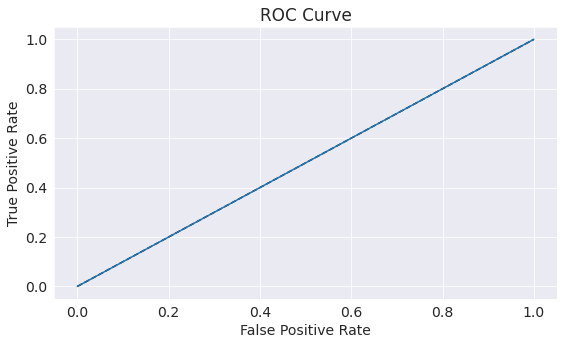

In [45]:
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, log_reg_pred)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()